In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better graph display in Jupyter
%matplotlib inline

In [2]:
# Load the CSV file (make sure the file is in the same folder as the notebook or provide full path)
df = pd.read_csv("sales.csv")

# Show the first few rows
df.head()

,sale_id,date,customer_id,product_id,quantity,price
0,1,2025-07-01,101,1,2,200
1,2,2025-07-01,102,2,1,150
2,3,2025-07-02,103,3,3,100
3,4,2025-07-03,101,1,1,200
4,5,2025-07-03,104,2,2,150


In [3]:
# Create a new column for total amount (quantity * price)
df['total_amount'] = df['quantity'] * df['price']

# Preview the updated dataframe
df.head()

,sale_id,date,customer_id,product_id,quantity,price,total_amount
0,1,2025-07-01,101,1,2,200,400
1,2,2025-07-01,102,2,1,150,150
2,3,2025-07-02,103,3,3,100,300
3,4,2025-07-03,101,1,1,200,200
4,5,2025-07-03,104,2,2,150,300


In [9]:
# Group by product name and sum total_amount
product_sales = df.groupby("product_name")["total_amount"].sum().sort_values(ascending=False)

# Display results
print("Top Products by Total Sales:\n", product_sales)

Top Products by Total Sales:
 product_name
Laptop        600
Smartphone    450
Headphones    400
Name: total_amount, dtype: int64


In [13]:
# Group by location
location_sales = df.groupby("location")["total_amount"].sum().sort_values(ascending=False)

# Display results
print("\nSales by Location:\n", location_sales)


Sales by Location:
 location
Chennai      600
Bangalore    300
Delhi        300
Mumbai       150
Hyderabad    100
Name: total_amount, dtype: int64


In [14]:
# Group by date
daily_sales = df.groupby("date")["total_amount"].sum()

# Display results
print("\nDaily Sales Trend:\n", daily_sales)


Daily Sales Trend:
 date
2025-07-01    550
2025-07-02    300
2025-07-03    500
2025-07-04    100
Name: total_amount, dtype: int64


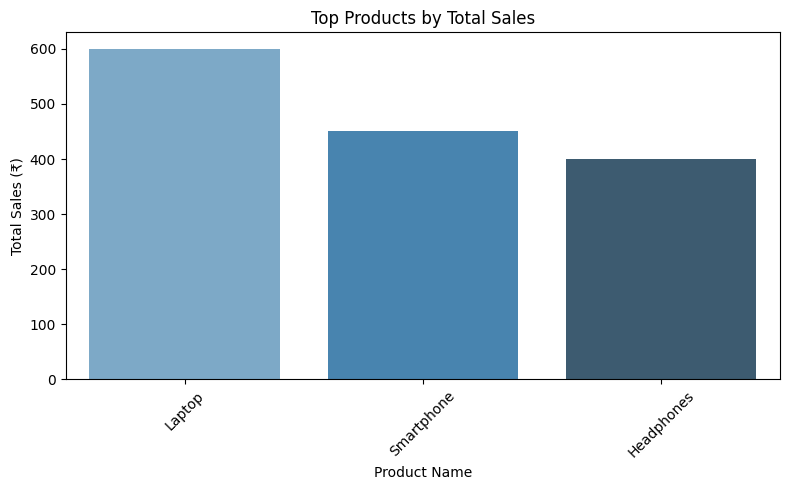

In [16]:
import pandas as pd

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    "product": product_sales.index,
    "sales": product_sales.values
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="product", y="sales", hue="product", palette="Blues_d", legend=False)
plt.title("Top Products by Total Sales")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

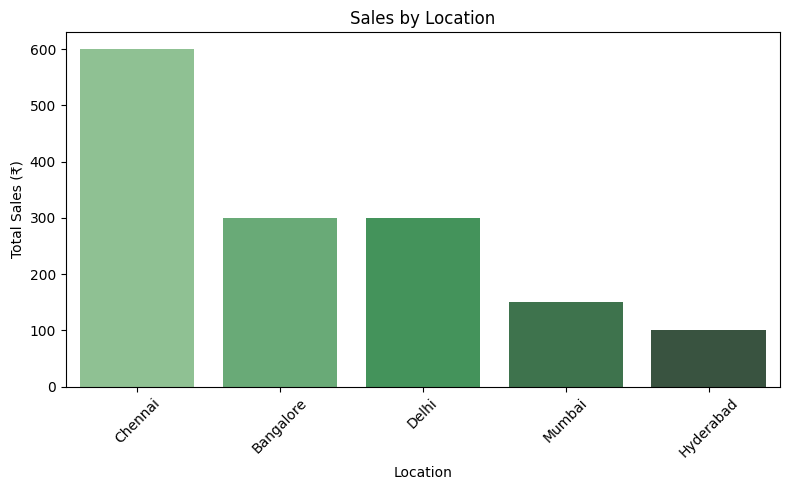

In [18]:
import pandas as pd

# Convert to DataFrame for plotting
plot_df = pd.DataFrame({
    "location": location_sales.index,
    "sales": location_sales.values
})

# Plot with hue assigned and legend disabled
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="location", y="sales", hue="location", palette="Greens_d", legend=False)
plt.title("Sales by Location")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


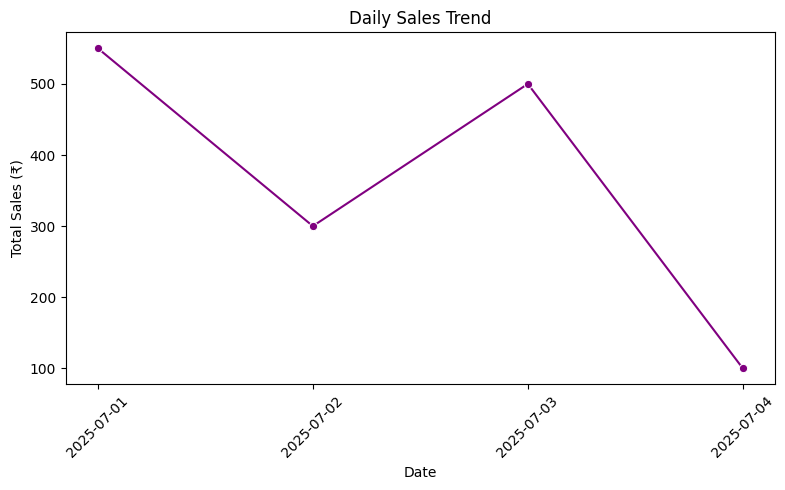

In [19]:
import pandas as pd

# Convert to DataFrame for plotting
plot_df = pd.DataFrame({
    "location": location_sales.index,
    "sales": location_sales.values
})

# Plot with hue assigned and legend disabled
plt.figure(figsize=(8, 5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker="o", color="purple")
plt.title("Daily Sales Trend")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()